In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('final_test.csv')

In [3]:
df.head()

,weight,age,height,size
0,62,28.0,172.72,XL
1,59,36.0,167.64,L
2,61,34.0,165.10,M
3,65,27.0,175.26,L
4,62,45.0,172.72,M


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119734 entries, 0 to 119733
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   weight  119734 non-null  int64  
 1   age     119477 non-null  float64
 2   height  119404 non-null  float64
 3   size    119734 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 3.7+ MB


In [5]:
df.isnull().sum()

weight      0
age       257
height    330
size        0
dtype: int64

In [7]:
df.dropna(axis = 0, inplace = True)

In [8]:
df.isnull().sum()

weight    0
age       0
height    0
size      0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119153 entries, 0 to 119733
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   weight  119153 non-null  int64  
 1   age     119153 non-null  float64
 2   height  119153 non-null  float64
 3   size    119153 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 4.5+ MB


In [10]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
df['size']= label_encoder.fit_transform(df['size']) 

In [12]:
df.head()

,weight,age,height,size
0,62,28.0,172.72,3
1,59,36.0,167.64,0
2,61,34.0,165.10,1
3,65,27.0,175.26,0
4,62,45.0,172.72,1


In [13]:
X = df.iloc[:,:-1].values 
y = df.iloc[:,1].values

In [14]:
y.shape

(119153,)

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0,test_size = 0.25)

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [34]:
from sklearn.linear_model import LogisticRegression

In [36]:
model = LogisticRegression()

In [37]:
model.fit(X_train,y_train)

C:\Users\ysing\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
y_pred = model.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [40]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 2],
       [0, 0, 0, ..., 0, 1, 5]], dtype=int64)

In [42]:
accuracy_score(y_test,y_pred)

0.6709523649669341

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
acc_list = []
err_list = []
for i in range(1,25):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test,y_pred)

    acc_list.append(acc)
    err_list.append(1-acc)

In [45]:
accuracy_score(y_test,y_pred)

0.857833428446742

In [46]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[3, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 2],
       [0, 0, 0, ..., 0, 0, 6]], dtype=int64)

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [65]:
model3 = DecisionTreeClassifier(criterion='gini')
model3.fit(X_train,y_train)

DecisionTreeClassifier()

In [68]:
model3.score(X_test,y_test)

0.9998657222464669

In [69]:
model3.score(X_train,y_train)

1.0

In [71]:
from sklearn import tree

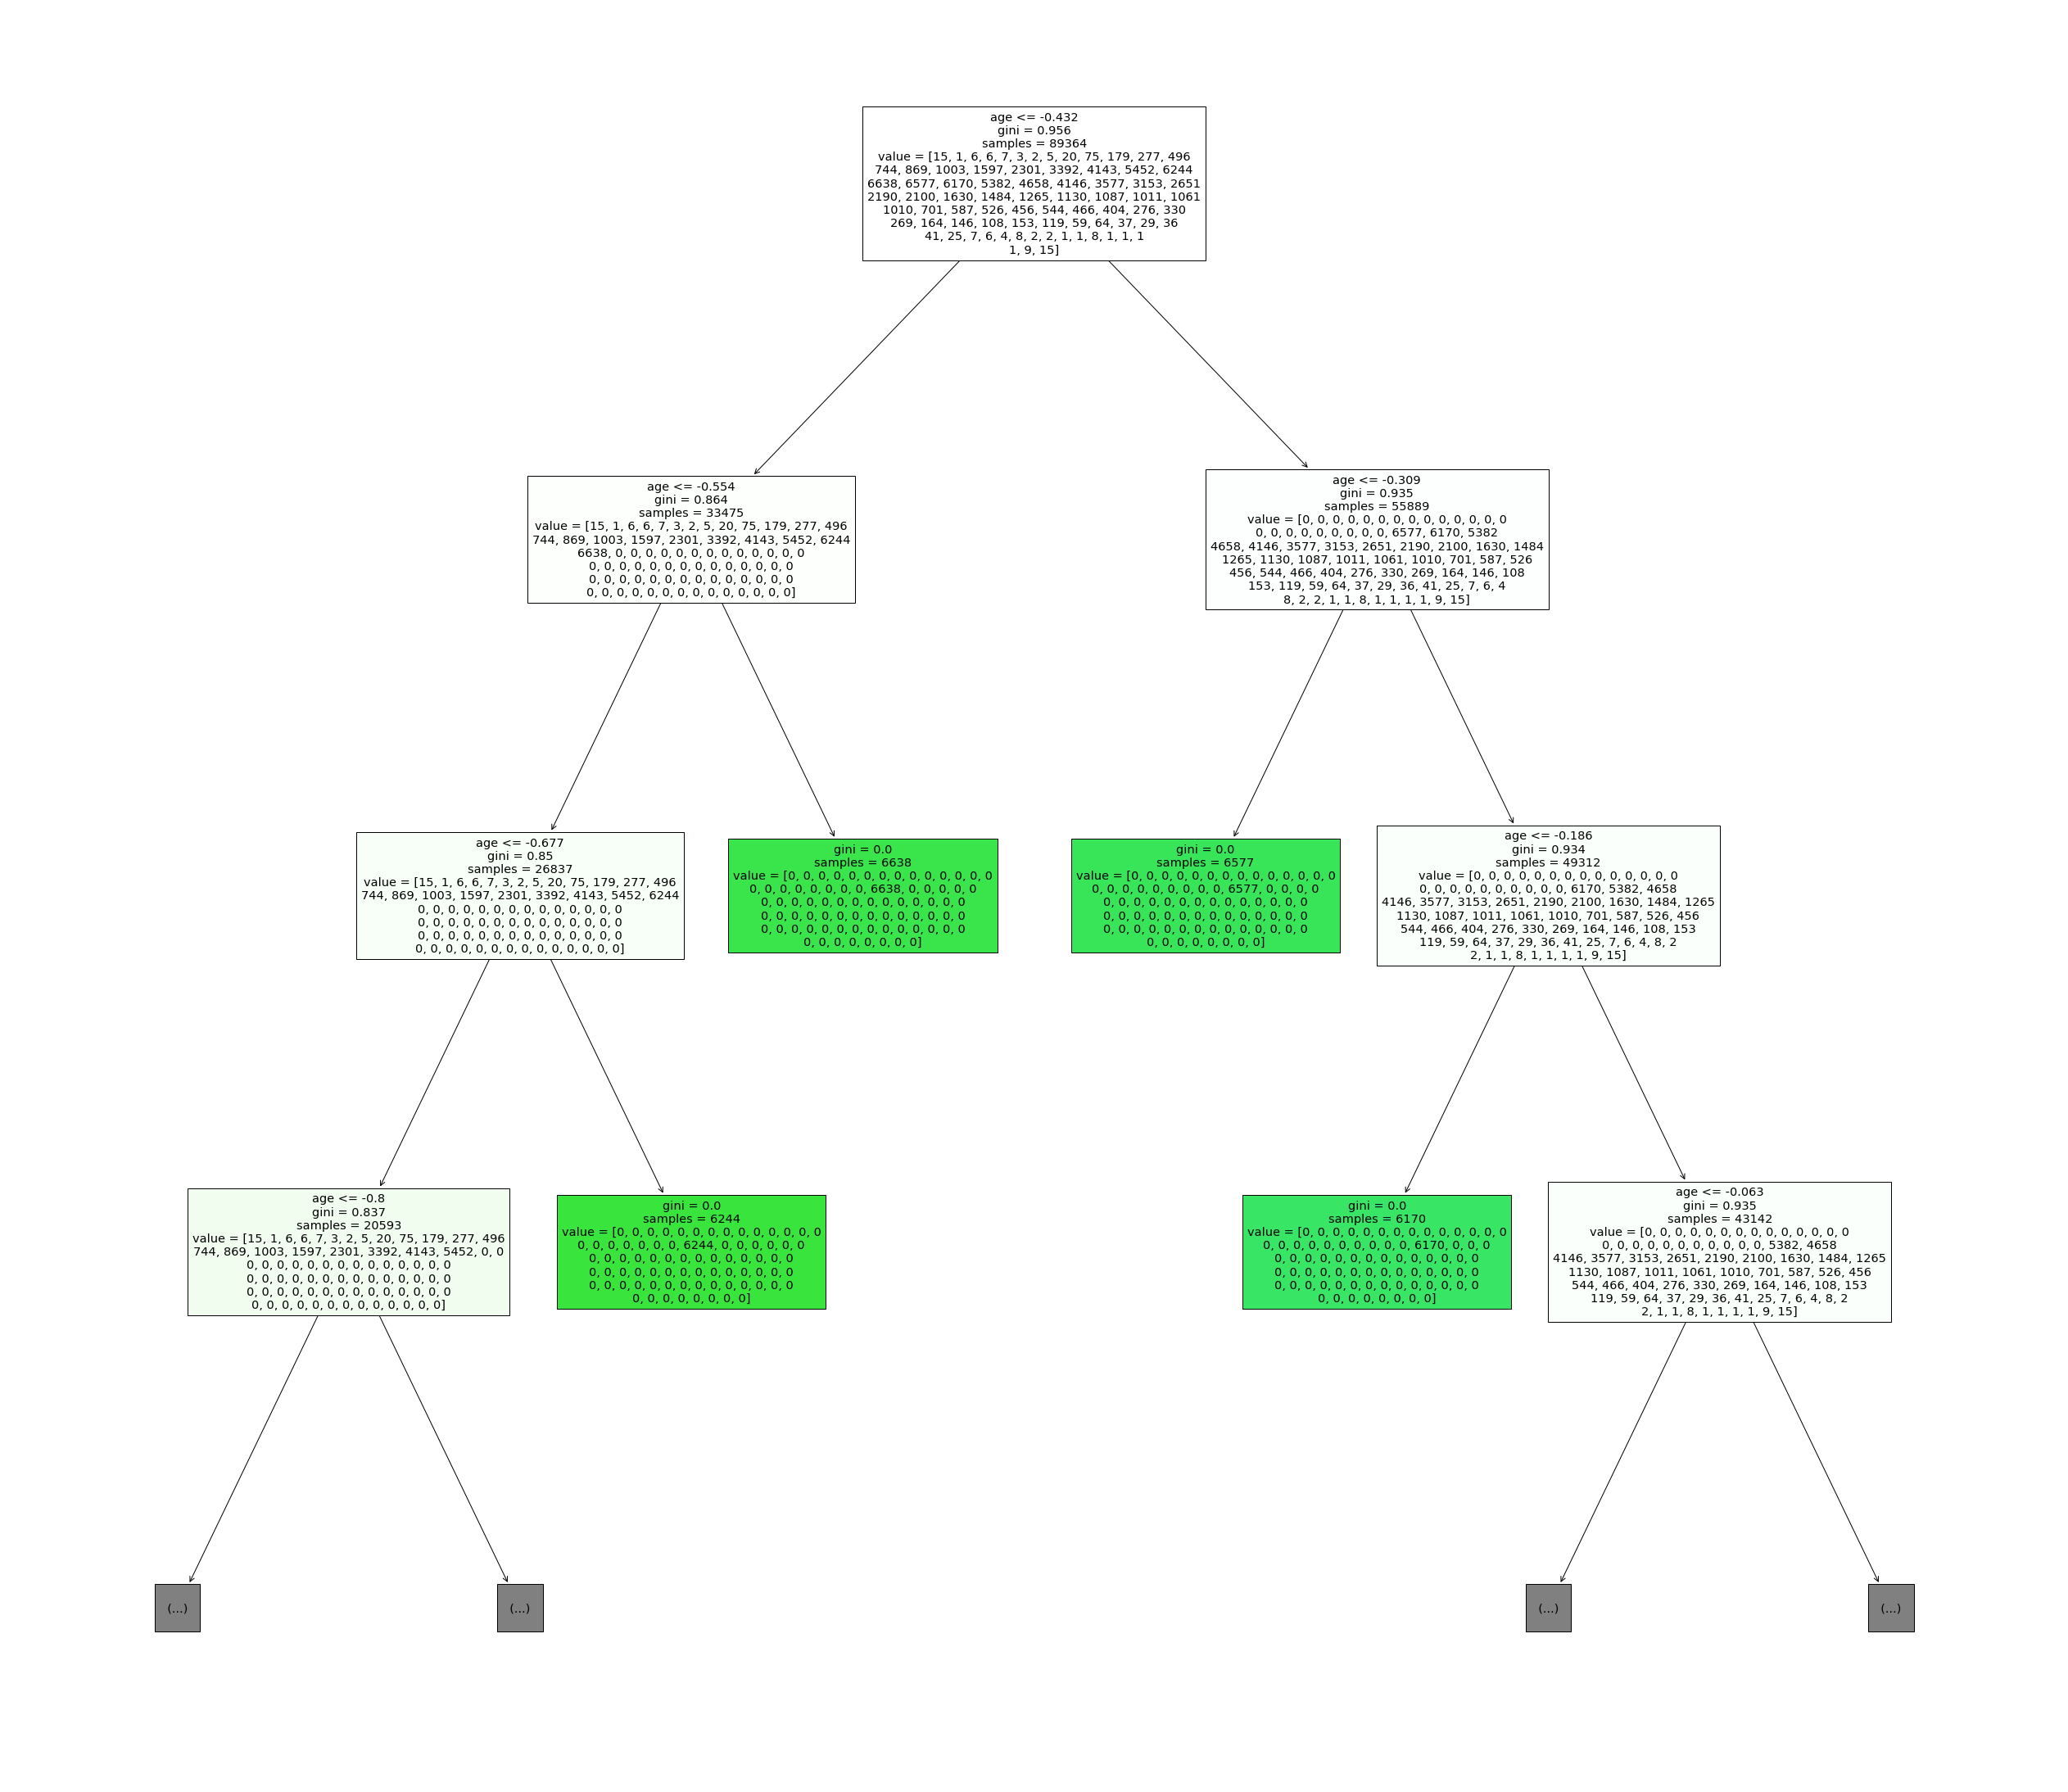

In [73]:

plt.figure(figsize=(45,40))
_ = tree.plot_tree(model, max_depth = 3,feature_names=df.columns[:-1],filled=True)